<a href="https://colab.research.google.com/github/PBHPBH/Machine_Learning/blob/NLP/6_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

imdb_dir = '/content/gdrive/My Drive/pytest/aclImdb_v1_small/aclImdb/'

Mounted at /content/gdrive


In [ ]:
#Train Data Loading
import os
train_dir = os.path.join(imdb_dir, 'train') # aclimdb 폴더의 훈련 데이터 내용을 가져온다
labels = [] ; texts = [] # labels와 texts 라는 두 개의 빈 리스트를 만든다

for label_type in ['neg', 'pos']: # train 폴더에 있는 pos 12,500 + neg 12,500 개의 데이터를 읽는다
    dir_name = os.path.join(train_dir, label_type) # neg와 pos 폴더 각각에 접근한다
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt': # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read()) # 텍스트를 읽어서 texts 리스트에 연결한다
            f.close()
            if label_type == 'neg': # 만약 현재 폴더가 neg 폴더라면
                labels.append(0) # texts와 같은 순서의 labels 리스트에 0을 저장한다
            else:
                labels.append(1) # pos 폴더라면 같은 순서의 labels 리스트에 1을 저장


In [ ]:
#Data 확인
print('texts 0:', texts[0])
print('texts len:', len(texts))

print('labels 0:', labels[0])
print('labels len:', len(labels))

print('texts type', type(texts))

texts 0: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
texts len: 60
labels 0: 0
labels len: 60
texts type <class 'list'>


In [ ]:
#Data Tokenizing

#텍스트에 사용된 단어의 조류를 빈도 순으로 정렬하는 작업을 수행한다
%tensorflow_version 2.x
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts)*0.3) # 최적 모델 판정을 위한 검증 샘플은 전체의 30%로 한다
max_words = 10000   #데이터셋에서 가장 빈도 높은 9,999개의 단어만 사용한다
maxlen = 200   #항상 각 문장의 길이가 200 단어가 되도록 고정한다

tokenizer = Tokenizer(num_words = max_words) #상위빈도 max_words개의 단어를 추려내는 Tokenizer객체 생성
tokenizer.fit_on_texts(texts)   #texts 내용에 대한 단어 인덱스를 구축한다. 사용할 단어가 결정된다.
word_index = tokenizer.word_index   #단어와 인덱스의 쌍을 가져온다



In [ ]:
#Tokenizing 결과확인
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' %len(word_index))
print('word_index_type: ', type(word_index))
print('word_index:', word_index)
#아직은 max_words(9,999)개가 아닌 전체 88,532개의 단어-빈도 쌍을 보여준다
#texts_to_sequences()를 거쳐야 각 문장에서 빈도순위 max_words(9,999)위까지만 남는다

#word index는 Dictionary 타입이며,
#토큰으로 선정된 각 단어에 대하여 index가 배당된 것을 알 수 있다

전체에서 2828개의 고유한 토큰을 찾았습니다.
word_index_type:  <class 'dict'>
word_index: {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'you': 21, 'not': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'an': 29, 'all': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'just': 37, 'so': 38, 'even': 39, 'who': 40, 'by': 41, 'my': 42, 'story': 43, 'about': 44, 'from': 45, 'out': 46, 'time': 47, 'when': 48, "it's": 49, 'very': 50, 'they': 51, 'no': 52, 'really': 53, 'if': 54, 'acting': 55, 'there': 56, 'every': 57, 'him': 58, 'ever': 59, 'most': 60, 'more': 61, 'great': 62, 'people': 63, 'other': 64, 'how': 65, 'also': 66, 'her': 67, 'too': 68, 'would': 69, 'bad': 70, 'their': 71, 'your': 72, 'made': 73, 'what': 74, 'she': 75, 'stanley': 76, 'can': 77, 'had': 78, 'me': 79, 'make': 80, 'plot': 81, 'characters'

In [ ]:
###################################################################################

In [ ]:
#Data Sequencing

#문자를 숫자로 변환하는 작업을 수행한다
#각 문장에서 상위 빈도 9,999(max_words)개의 단어만 추출하여 word_index의 숫자를 가지는 리스트로 변환한다.
data = tokenizer.texts_to_sequences(texts)  #빈도 10,000의 Tokenizer 결과가 여기서 반영된다

print('data 0:', data[0])
# 각 단어들이 숫자 형태의 리스트로 변형되었다
# texts의 첫 번째 행의 단어들이 숫자로 변한 모습을 보여준다
# 상위 빈도 10,000에 속하는 것들이므로 숫자의 범위가 1~9999이다
# 빈도 9,999 내에 속하지 않는 단어들은 버려진다
print('text 0:', texts[0])#texts[0]의 본래의 단어들

data 0: [43, 4, 3, 179, 40, 34, 1140, 308, 13, 3, 686, 494, 46, 17, 3, 1141, 142, 12, 7, 3, 687, 384, 4, 688, 495, 3, 1142, 689, 496, 7, 690, 90, 29, 691, 1143, 1144, 41, 1, 692, 1145, 4, 49, 1146, 309, 11, 693, 688, 1, 180, 47, 17, 52, 385, 1147, 1148, 254, 11, 37, 68, 181, 1149, 39, 216, 45, 1, 694, 106, 26, 690, 181, 1, 1150, 1151, 69, 80, 1152, 310, 695, 5, 3, 1153, 1154, 25, 3, 1155, 311, 49, 143, 144, 21, 255, 115, 17, 36, 33, 497, 41, 312, 62, 1156, 1157, 312, 386, 1158, 1159, 2, 1160, 1161, 77, 26, 123, 1162]
text 0: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. 

In [ ]:
#타입확인

#현재의 texts와 data의 타입은 list
print(type(texts))
print(type(data))

<class 'list'>
<class 'list'>


In [ ]:
#Data Padding 연습
#Padding은 데이터의 길이를 고정시켜준다
#지정된 길이에 모자라는 것은 0으로 채우고, 넘치는 것은 잘라낸다
#넘치는 것을 잘라내는 이유는 문자잉 길어질수록 많은 종류의 단어가 나오기때문
#또한, 길이를 고정해야 텐서의 크기가 맞춰진다
#기본값으로 단어의 선택은 뒤에서부터 한다.
#또한 nested list를 2D 텐서(2차원 넘파이 배열)로 만든다

from keras.preprocessing.sequence import pad_sequences
sequences = [[1, 2, 3, 4, 5], [1, 2, 3, 4], [1]]
padded = pad_sequences(sequences, maxlen=3)
print(padded)
#maxlen = 3 으로 하였으므로,
#첫 번째 내부 리스트는 3,4,5 두번째 내부 리스트는 2,3,4가 선택되었다
#세번째 내부 리스트는 길이가 모자라므로 앞에서부터 0으로 채웠다

[[3 4 5]
 [2 3 4]
 [0 0 1]]


In [ ]:
data = pad_sequences(data, maxlen=maxlen)
print('data=',data)
print('data0=', data[0])
print(len(data[0]))

data= [[   0    0    0 ...   26  123 1162]
 [   0    0    0 ...  501   71  200]
 [ 187  150    6 ...  725  723  268]
 ...
 [ 118 2767   13 ...    3 2801   88]
 [   0    0    0 ...    2 2811  443]
 [   0    0    0 ... 2828    6    6]]
data0= [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   43    4    3  179   40   34 1140  308   13    3
  686  494   46   17    3 1141  142   12    7    3  687  384    4  688
  495    3 1142  689  496    7  690   90   29  691 1143 1144   41    1
  692 1145    4   49 1146  309   11  693  688    1  180   47   17   52
  385 1147 1148  254   11   37   68  181 1149   3

In [ ]:
#타입  확인
#Padding을 거치게 되면 Numpy 배열로 바뀌고, shape를 갖는다(2D tensor)

print(type(texts))
print(type(data))
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(60, 200)


In [ ]:
#One-Hot Encoding 연습

#One-hot enccoding은 모든 숫자를 0과 1로 만든다
#그렇지 않으면 index값이 특성의 크기로 간주한다

sample = [[5,6,7], [8,9,10]]
arr = np.zeros((len(sample), 10+1))# '10'은 11번째에 들어가게  되므로 11개의공간을 만든다(패딩0고려)

for i, seq in enumerate(sample):    #리스트가 2개이므로 i는 총 2회(0, 1)반복되며,
    arr[i,seq] = 1. #각 i에서 리스트의 number가 가리키는 곳에 1을 기록한다

arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [ ]:
# 원-핫 인코딩 함수
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# data를 one-hot-encoding으로 0과 1의 벡터로 변환
# label은 이미 0과 1로 태깅되어 있으므로, list에서 넘파이 배열로만 변환. float32를 지정하지 않으면 int32로 저장된다
data=  to_one_hot(data, dimension=max_words) 
labels = np.asarray(labels).astype('float32') 

IndexError: ignored

In [ ]:
#One-Hot Encoding 결과 확인
print('data:', data)
print(len(data[0])) # dimension=10000으로 했으므로 각 행은 10,000개를 가지고 있다
print('data [0][0:100]:', data[0][0:100])

data: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
10000
data [0][0:100]: [0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
#타입확인
# One-Hot Encoding을 거치게 되면 타입은 그대로이나 shape가 바뀐다
print(type(texts)) # list
print(type(data)) # numpy.ndarray
print(data.shape) # (25000, 10000) small 데이터는 (60, 10000)

<class 'list'>
<class 'numpy.ndarray'>
(60, 10000)


In [ ]:
#Train 데이터와 Validation 데이터 준비
print('데이터 텐서의 크기:', data.shape) # (25000, 10000)
print('레이블 텐서의 크기:', labels.shape) # (25000,) 
indices = np.arange(data.shape[0]) # 0 ~ 24999 까지의 숫자를 생성
np.random.shuffle(indices) # 0 ~ 24999 까지의 숫자를 랜덤하게 섞음
data = data[indices] # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음
labels = labels[indices] # label도 같은 순서로 섞음
print(indices)

데이터 텐서의 크기: (60, 10000)
레이블 텐서의 크기: (60,)
[57 15  7 40 30 12 46 51 59 54 49 43 22 50  3 28  8  2 19 35  6  1 29 44
 58 26 39 45 17 34 41 10 25 16 36  5 32 48 56 14 23  4 38 21 11 27 42 53
 18 47  0  9 37 33 55 13 52 31 24 20]


In [ ]:
#훈련데이터와 검증데이터 분리
x_train = data[validation_ratio:] # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 Label (data와 labels는 같은 순서)
x_val = data[:validation_ratio] # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio] # 훈련데이터의 30%를 검증데이터 Label

In [ ]:
#모델 정의하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential() # 모델을 새로 정의
model.add(Dense(64, activation='relu', input_shape=(max_words,))) # 첫 번째 은닉층. activation은 다음 층으로 값을 넘기는 방법
model.add(Dense(32, activation='relu')) # 두 번째 은닉층
model.add(Dense(1, activation='sigmoid')) # 출력층
# 이진분류 문제이고 신경망의 출력이 확률로 나와야 하므로,
# 0~1로 출력하는 sigmoid를 택하고, 노드는 1개로 하였다
# 다중분류에서는 softmax를 사용한다

In [ ]:
#모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile & Train Model
# 모델 컴파일
# 신경망의 출력이 확률이므로 오차값 계산은 crossentropy를 사용하는 것이 최선이다. https://keras.io/losses/ 에서 종류 참조
# 또한 이진 분류이므로 binary_crossentropy를 사용한다. 다중 분류에서는 categorical_crossentropy를 사용한다
# 가중치 업데이트 방법은 RMSprop을 사용하였다. https://keras.io/optimizers/ 에서 종류 참조
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 모델 훈련
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련한다. 보통 8 ~ 512개 중에서 찾는다
# 훈련 데이터로 훈련하고, 검증 데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 1s 186ms/step - loss: 0.6930 - acc: 0.5000 - val_loss: 0.6866 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 33ms/step - loss: 0.4847 - acc: 0.9524 - val_loss: 0.6348 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 35ms/step - loss: 0.3174 - acc: 1.0000 - val_loss: 0.6094 - val_acc: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 33ms/step - loss: 0.2020 - acc: 1.0000 - val_loss: 0.5888 - val_acc: 0.6667
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 0.1361 - acc: 1.0000 - val_loss: 0.5608 - val_acc: 0.6111
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0937 - acc: 1.0000 - val_loss: 0.5411 - val_acc: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0678 - acc: 1.0000 - val_loss: 0.5588 - val_acc: 0.6111
Epoch 8/10
2/2 [==============================] - 0s 35ms/step - loss: 0.0523 - acc: 1.0000 - va

In [ ]:
#경로 변경
# 파일이 있는 곳으로 경로를 변경한다
%cd /content/gdrive/MyDrive/pytest/

/content/gdrive/MyDrive/pytest


In [ ]:
ls

네이버뉴스-생활문화_다중/  kor-eng/      pytest_position.png  test.csv
aclImdb_v1_small/          negative.txt  ratings_morphed.txt  김소월시.txt
alice.png                  newfile2.txt  ratings_small.txt    윤동주시.txt
fra-eng/                   newfile.csv   ratings.txt          wiki_test.txt
iris.csv                   positive.txt  similarity/          word2vec/


In [ ]:
#Save Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_binary_model.h5')
# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#Accuracy & Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc) # [0.79, 0.90, 0.93, 0.94, 0.96, 0.97, 0.98, 0.98, 0.98, 0.99]
epochs = range(1, len(acc) +1) # range(1, 11)

Accuracy of each epoch: [0.5, 0.9523809552192688, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


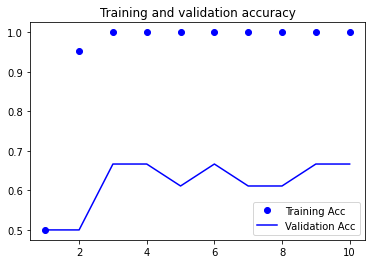

In [ ]:
#Plotting Accuracy
import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다
# epoch가 늘어나면 모델은 훈련데이터에 매우 민감해져(과대적합) 오히려 새로운 데이터를 잘 못 맞춘다
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

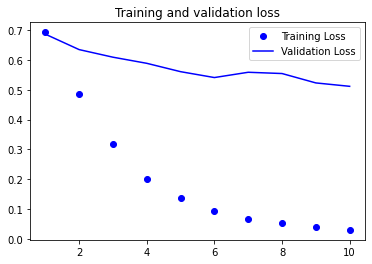

In [ ]:
#Plotting Loss
plt.figure() # 새로운 그림을 그린다

# 훈련데이터의 손실값은 낮아지나, 검증데이터의 손실값은 높아진다
# 손실값은 오류값을 말한다. 예측과 정답의 차이를 거리 계산으로 구한 값이다
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
#Load Model
import os
from tensorflow.keras.models import load_model

filepath = '/content/gdrive/My Drive/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_binary_model.h5')
print("model loaded:", loaded_model)

with open('text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


Current Directory: /content/gdrive/My Drive/pytest
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5e1472b950>


In [ ]:
#Test Data Loading
test_dir = os.path.join(imdb_dir, 'test') # aclimdb 폴더의 테스트 데이터 내용을 가져온다
labels = [] ; texts = [] # labels와 texts 라는 두 개의 빈 리스트를 만든다

for label_type in ['neg', 'pos']: # test 폴더에 있는 pos 12,500 + neg 12,500 개의 데이터를 읽는다
    dir_name = os.path.join(test_dir, label_type) # neg와 pos 폴더 각각에 접근한다
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt': # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read()) # 텍스트를 읽어서 texts 리스트에 연결한다
            f.close()
            if label_type == 'neg': # 만약 현재 폴더가 neg 폴더라면
                labels.append(0) # texts와 같은 순서의 labels 리스트에는 0을 저장한다
            else:
                labels.append(1) # pos 폴더라면 같은 순서의 labels 리스트에 1을 저장
#여기서 validation data는 최적 epochs를 찾는 데 사용되고, test data는 최적 epochs로 만들어진 모델의 성능을 평가하는 데 사용된다

In [ ]:
#Data 확인
print('texts:', texts[0])
print('texts len:', len(texts))

texts: Alas, another Costner movie that was an hour too long. Credible performances, but the script had no where to go and was in no hurry to get there. First we are offered an unrelated string of events few of which further the story. Will the script center on Randall and his wife? Randall and Fischer? How about Fischer and Thomas? In the end, no real front story ever develops and the characters themselves are artificially propped up by monologues from third parties. The singer explains Randall, Randall explains Fischer, on and on. Finally, long after you don't care anymore, you will learn something about the script meetings. Three endings were no doubt proffered and no one could make a decision. The end result? All three were used, one, after another, after another. If you can hang in past the 100th yawn, you'll be able to pick them out. Despite the transparent attempt to gain points with a dedication to the Coast Guard, this one should have washed out the very first day.
texts len: 

In [ ]:
#Data Sequencing
# 문자열을 word_index의 숫자 리스트로 변환
data = loaded_tokenizer.texts_to_sequences(texts)

# padding으로 문자열의 길이를 고정시킨다
data = pad_sequences(data, maxlen=maxlen) 

# test 데이터를 원-핫 인코딩한다
x_test = to_one_hot(data, dimension=max_words)

# label을 list에서 넘파이 배열로 변환. 결과가 0 또는 1만 나오므로 이와같이 int32로 저장해도 된다
# 다중분류에서는 이 부분도 원-핫 인코딩 한다
y_test = np.asarray(labels)

In [ ]:
#Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test) # 모델에 분류할 데이터와 그 정답을 같이 넣어준다
print('prediction model loss & acc:', test_eval) # 모델이 분류한 결과와 입력된 정답을 비교한 결과

#최적 epoch를 적용하지 않고 사용한 모델의 정확도

1/1 [==============================] - 0s 107ms/step - loss: 0.7442 - acc: 0.4500
prediction model loss & acc: [0.7442428469657898, 0.44999998807907104]


In [ ]:
#1개 데이터 예측
text = ["Hi, this is a test sentence."] # 데이터를 list 타입으로 만든다
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)
prediction = loaded_model.predict(x_test)
print("Result:", prediction) # [[0.57845604]]. 1이 될 확률이 57.8%
# 다중 분류에서는 다음과 같이 넘파이의 함수를 이용해 가장 큰 값을 찾는다
# print(" Result :", np.argmax(predictions[0]))

Result: [[0.4698751]]
